In [387]:
import csv
import ROOT


In [388]:
import pandas as pd

In [389]:
import mplhep
mplhep.style.use('ROOT')
import matplotlib.pyplot as plt
import numpy as np

In [390]:

#f = ROOT.TFile('hist-no-filtering.root')
#d = f.Get('MAC2')
c = ROOT.TCanvas()

In [391]:
smear = pd.read_csv('cellstats.csv')

In [392]:
smear.describe()


,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF
count,14688.000000,14688.000000,14688.000000,1.466200e+04,1.466200e+04,1.466200e+04,14662.000000,14662.000000,1.466200e+04,14662.000000,1.466200e+04,14662.000000
mean,16.500000,11.666667,11.333333,-2.710354e+37,4.147525e+07,1.061562e-01,3.061363,0.001186,5.356017e+11,842.823975,8.742970e-03,29.498704
std,9.811042,6.320377,6.320377,1.577512e+38,3.075036e+09,9.636247e-03,0.542424,0.027904,6.485426e+13,2021.815904,6.607335e-02,20.672170
min,0.000000,0.000000,0.000000,-1.885921e+39,5.157280e-05,2.659539e-12,0.000000,-0.000049,4.250505e-20,0.689010,0.000000e+00,0.000000
25%,8.000000,7.000000,6.000000,-5.049868e+31,1.414214e+00,1.050368e-01,3.156606,-0.000049,1.414214e+00,62.000000,2.866215e-103,14.000000
50%,16.500000,12.000000,11.000000,-1.352185e+24,1.414214e+00,1.050368e-01,3.156606,-0.000049,1.414214e+00,157.000000,8.082474e-22,25.000000
75%,25.000000,17.000000,16.000000,-3.982085e+16,1.414214e+00,1.050368e-01,3.156606,-0.000049,1.414214e+00,597.082457,9.649030e-08,39.000000
max,33.000000,23.000000,23.000000,1.977636e+10,3.005652e+11,5.156814e-01,4.996490,1.607291,7.852991e+15,18577.000000,9.991150e-01,97.000000


In [393]:
no_smear = pd.read_csv('narrow-cellstats.csv')

In [394]:
no_smear.describe()

,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF
count,14688.000000,14688.000000,14688.000000,13706.000000,1.370600e+04,1.370600e+04,13706.000000,1.370600e+04,1.370600e+04,1.370600e+04,13706.000000,13706.000000
mean,16.500000,11.666667,11.333333,848.918422,1.848915e+03,1.562095e-01,0.777889,5.823160e+02,1.461036e+05,9.484301e+01,0.472455,20.112578
std,9.811042,6.320377,6.320377,6583.076008,3.037394e+04,3.256471e-01,1.506386,4.437017e+04,1.177729e+07,8.013965e+02,0.361927,17.113296
min,0.000000,0.000000,0.000000,5.535730,1.065719e-03,2.775558e-16,0.000148,3.466807e-04,5.352287e-05,5.608859e-11,0.000000,0.000000
25%,8.000000,7.000000,6.000000,13.639784,5.321694e+00,1.253276e-01,0.003947,1.551984e-02,2.350318e-03,4.874529e+00,0.079602,8.000000
50%,16.500000,12.000000,11.000000,52.065276,1.430401e+01,1.372997e-01,0.014139,5.334461e-02,9.948155e-03,1.295582e+01,0.491905,15.000000
75%,25.000000,17.000000,16.000000,236.868567,3.956723e+01,1.653638e-01,0.351448,1.519893e-01,1.306756e-01,3.337330e+01,0.817775,27.000000
max,33.000000,23.000000,23.000000,517467.391607,2.702253e+06,5.000000e+00,4.999987,5.057978e+06,1.350465e+09,2.921828e+04,1.000000,97.000000


In [367]:
smear_mpvratio= abs(smear.MPV_Error/smear.MPV)

In [395]:
no_smear_mpvratio= abs(no_smear.MPV_Error/no_smear.MPV)

In [398]:
valid_smear = smear[(smear.NDF>5) & (smear_mpvratio<0.05) ]

In [399]:
valid_smear.describe()

,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF
count,373.000000,373.000000,373.000000,3.730000e+02,3.730000e+02,373.000000,373.000000,3.730000e+02,3.730000e+02,373.000000,373.000000,373.000000
mean,0.091153,11.592493,10.742627,2.067966e+08,2.441624e+08,0.139054,0.001239,8.091849e-03,2.105360e+13,114.043785,0.160387,22.372654
std,0.288213,6.319891,6.038695,1.820570e+09,2.892491e+09,0.009541,0.001630,7.706634e-03,4.066125e+14,256.930723,0.192806,13.201621
min,0.000000,0.000000,0.000000,5.841729e+01,1.541899e+01,0.045121,0.000000,8.923981e-07,1.795794e-07,4.577446,0.000000,6.000000
25%,0.000000,6.000000,6.000000,4.874624e+02,6.161934e+01,0.135323,0.000006,9.354884e-05,2.112467e-06,15.838328,0.000139,13.000000
50%,0.000000,12.000000,10.000000,1.344668e+04,2.631513e+02,0.135516,0.000438,1.030265e-02,2.368248e-04,26.151167,0.086449,18.000000
75%,0.000000,17.000000,15.000000,1.501450e+06,3.984536e+05,0.140409,0.002120,1.559716e-02,1.306867e-03,64.653225,0.261029,28.000000
max,1.000000,23.000000,23.000000,1.977636e+10,4.619404e+10,0.170515,0.007050,2.510923e-02,7.852991e+15,2023.825433,0.881181,62.000000


In [400]:
valid_no_smear = no_smear[(no_smear.NDF>5) & (no_smear_mpvratio<0.05) ]

In [401]:
valid_no_smear.describe()

,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF
count,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000
mean,19.489569,11.427177,10.836172,1254.392197,157.759064,0.143752,0.003330,0.023059,0.002192,139.722918,0.249370,30.097225
std,9.670843,3.939059,4.619764,7720.373183,4541.322273,0.024269,0.001874,0.019482,0.001646,593.304171,0.289931,20.257146
min,0.000000,1.000000,0.000000,52.199215,12.369700,0.118815,0.000148,0.000356,0.000054,1.593706,0.000000,6.000000
25%,12.000000,8.000000,7.000000,165.033580,28.726314,0.133247,0.001816,0.013549,0.001000,14.223673,0.000098,14.000000
50%,21.000000,11.000000,11.000000,333.386694,44.813898,0.136241,0.003075,0.015030,0.001794,32.784403,0.106643,25.000000
75%,28.000000,14.000000,14.000000,948.279925,73.434905,0.146015,0.004622,0.020652,0.002921,82.836040,0.477962,41.000000
max,33.000000,22.000000,22.000000,517467.391607,297787.197444,0.994967,0.009570,0.485327,0.016706,13306.158244,0.990160,97.000000


In [402]:
invalid=valid_no_smear[(valid_no_smear.MPV<0.1)]

In [403]:
invalid = invalid[(invalid.Layer == 0)]

In [404]:
#invalid=cellstats[(mpvratio>0.05)&(cellstats.MPV>1)& (cellstats.Layer == 0)] # for layer 0, with an MPV greater than one and mpvratio greater than 5%


In [405]:
invalid.describe()

,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
l=0
invalid_list = []
for i, row in invalid.iterrows():
    #l = int(row['Layer'])
    u = int(row['U'])
    v =int(row['V'])
    x = 'MAC2_cell_amplitude_l'+ str(l)+'_m0_u'+str(u)+'_v'+str(v)
    invalid_list.append(x)
    

In [407]:
x

'MAC2_cell_amplitude_l0_m0_u23_v17'

In [408]:
#negvalid_list

In [409]:
len(invalid_list)

0

In [382]:
invalid_list[21]

'MAC2_cell_amplitude_l0_m0_u14_v4'

 FCN=2.82838 FROM HESSE     STATUS=OK             16 CALLS         238 TOTAL
                     EDM=9.852e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.24367e+00   2.74801e+00   3.44032e-04   6.95331e-04
   2  MPV          1.74453e-08   4.59995e+00   7.33023e-04** at limit **
   3  Sigma        6.01782e-01   1.16336e+00   1.46340e-04   1.78283e-03


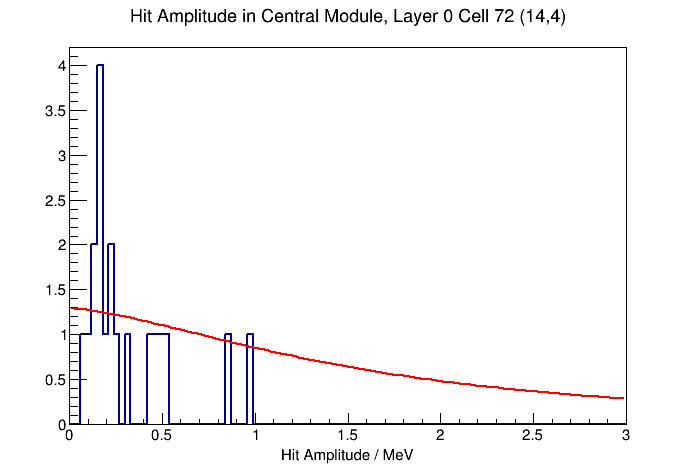

In [384]:
f = ROOT.TFile('hist-no-filtering-narrow.root')
d = f.Get('MAC2')
c = ROOT.TCanvas()
fl = ROOT.TF1('seedparamslandau','landau')
fl.SetParameters(1,0.1,0.1)
fl.SetParLimits(1,0,5)
h = d.Get(invalid_list[21])
h.Draw()
fr = h.Fit(fl,'BSM').Get()
h.Draw()
c.Draw()

In [386]:
fr.Ndf()

11

In [22]:
###scipy code
import uproot
#import numpy as np
import scipy
#import matplotlib.pyplot as plt

# landau is provided by https://github.com/SengerM/landaupy
from landaupy import landau

def scaled_landau(amplitude, constant, mpv, width):
    return constant*landau.pdf(amplitude, x_mpv=mpv, xi=width)

def fit(histogram, drop_zero_bins = True):
    x = histogram.axis().centers()
    y = histogram.values()
    yerr = np.sqrt(histogram.variances())

    if drop_zero_bins:
        x = x[y > 0]
        yerr = yerr[y > 0]
        y = y[y > 0]

    return scipy.optimize.curve_fit(
        scaled_landau,
        xdata = x,
        ydata = y,
        sigma = yerr,
        absolute_sigma = True
    )


def fit_and_plot(histogram, fit_kw = {}, plt_range = None, **plot_kw):
    opt, cov = fit(histogram, **fit_kw)
    if plt_range is None:
        plt_range = histogram.axis().centers()
    mplhep.histplot(histogram, label='Histogram')
    plt.plot(plt_range, scaled_landau(plt_range, *opt), label='Fit', **plot_kw)
    plt.legend()
    return opt, cov

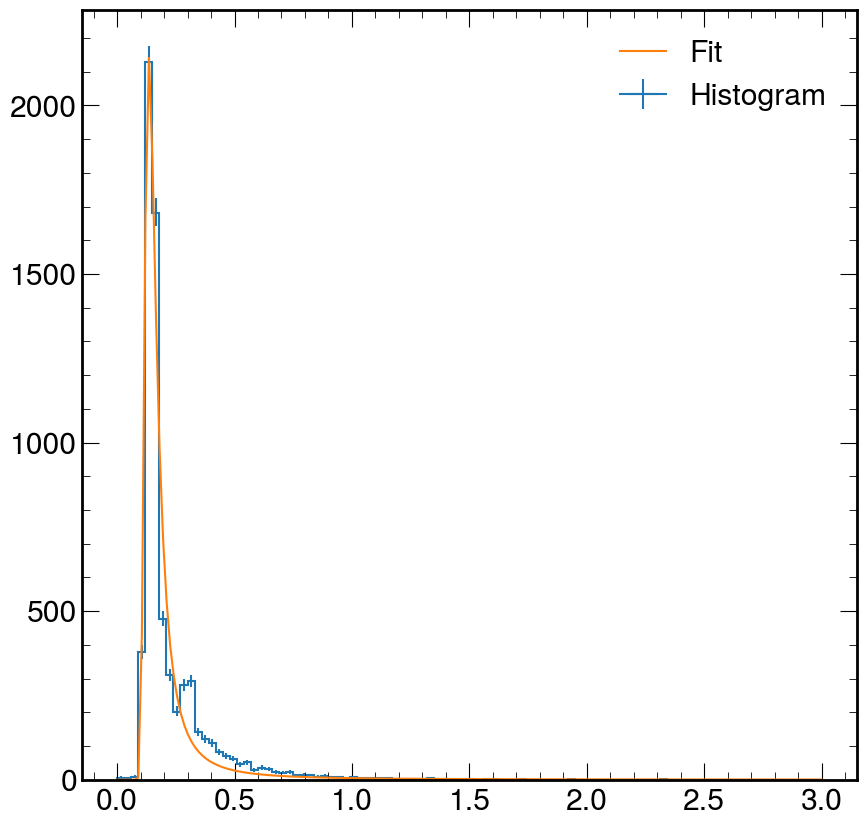

In [113]:
file = uproot.open('hist-no-filtering.root')
#for i in invalid_list:
opt, cov = fit_and_plot(
    file['MAC2/'+ x],#invalid_list[3]],
    plt_range=np.linspace(0,3,200)
    )
err = np.sqrt(np.diag(cov))
#plt.axvline(0.26, color='gray')
#plt.show()


In [24]:
print('[Constant x_MPV Sigma]')
print(opt)
print(n))

[Constant x_MPV Sigma]
[1.87658480e+02 1.34971004e-01 1.58271545e-02]
[2.40326652e+00 4.24769169e-04 2.41601745e-04]


In [98]:
print (cellstats[(cellstats.U == u) & (cellstats.V==v)& (cellstats.Layer == l) ])

     Layer   U   V      Constant  Constant_Error       MPV  MPV_Error  \
308      0  16  12 -25412.075057      311.651352  4.152987   1.414214   

        Sigma  Sigma_Error    Chi2    P   NDF  
308  0.037006     1.061831  6752.0  0.0  53.0  


In [114]:
print('[Constant x_MPV Sigma]')
print(opt)
print(err)


[Constant x_MPV Sigma]
[1.87658480e+02 1.34971004e-01 1.58271545e-02]
[2.40326652e+00 4.24769169e-04 2.41601745e-04]


In [55]:
opt[1]

0.13536998681400317

In [56]:
Header = ['Layer','U','V','Constant','Constant_Error','MPV','MPV_Error','Sigma','Sigma_Error']

In [93]:
stats = [l,u,v]


In [115]:
constant = opt[0]
c_err = err[0]
mpv = opt [1]
mpv_err = err[1]
sigma = opt[2]
sig_err = err[2]

In [116]:
c_err

2.4032665211880526

In [117]:
stats.extend((constant,c_err, mpv, mpv_err,sigma,sig_err))

In [118]:
stats

[0,
 16,
 12,
 187.65848003455434,
 2.4032665211880526,
 0.13497100412970922,
 0.0004247691692573758,
 0.01582715448585461,
 0.00024160174455693426]

[0, 16, 12]
[0, 16, 12]
[0, 16, 12]
[0, 16, 12]
[0, 16, 12]
[0, 16, 12]


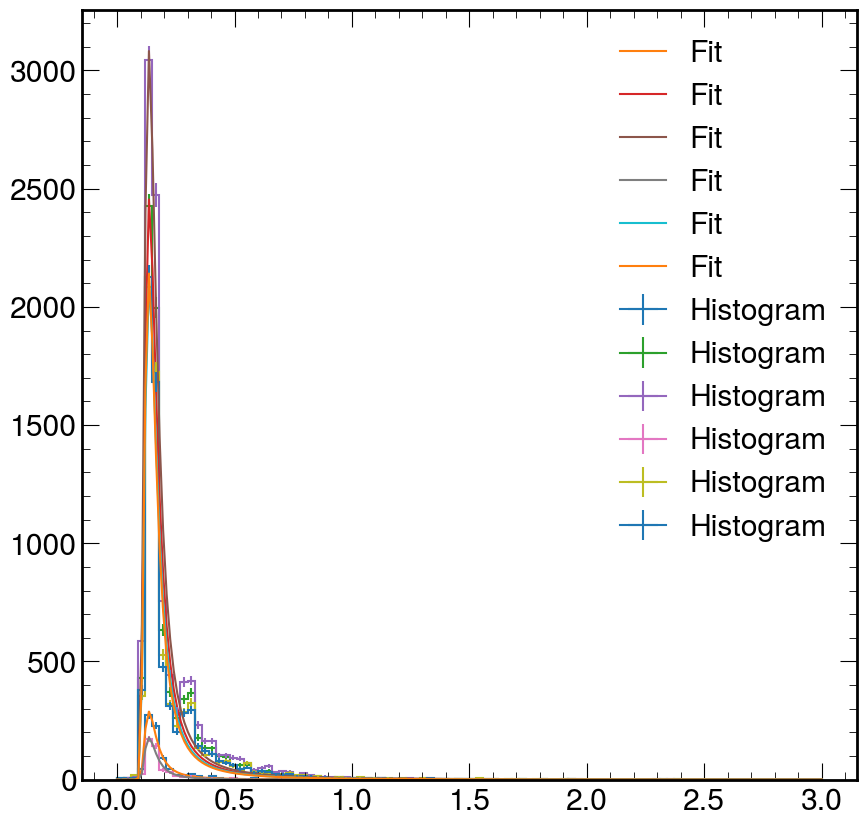

In [106]:
#now over  a larger amount?
file = uproot.open('hist-no-filtering.root')

for i in range(len(invalid_list)):
    opt, cov = fit_and_plot(
        file['MAC2/'+ invalid_list[i]],
        plt_range=np.linspace(0,3,200)
        )
    err = np.sqrt(np.diag(cov))
    for i, row in invalid.iterrows():


In [ ]:
for i, row in invalid.iterrows():
    #l = int(row['Layer'])
    u = int(row['U'])
    v =int(row['V'])
    x = 'MAC2_cell_amplitude_l'+ str(l)+'_m0_u'+str(u)+'_v'+str(v)
    opt, cov = fit_and_plot(
        file['MAC2/'+ x],
        plt_range=np.linspace(0,3,200)
        )
    err = np.sqrt(np.diag(cov))